##  Приоритизация гипотез.

In [107]:
# импортируем необходимые библиотеки
import pandas as pd 
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [108]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [109]:
hypothesis # изучаем содержимое файла

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [110]:
 # переименовываем столбцы, чтобы начинались с маленькой буквы
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [111]:
# добавляем параметр ICE
pd.set_option('display.max_colwidth', None) # отображаем тест в ячейуах полностью
hypothesis['ICE'] = round(hypothesis['confidence']*hypothesis['impact']/hypothesis['efforts'],2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 8, 0, 7 :

-  8.	Запустить акцию, дающую скидку на товар в день рождения
-  0.   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
-  7.   Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

In [112]:
# добавляем параметр RICE
hypothesis['RICE'] = (hypothesis['impact']* hypothesis['confidence']*hypothesis['reach'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По RICE наиболее перспективные гипотезы: 7,2,0 :

- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

После применения метода RICE гипотезы 0  и 7 остались в первой тройке, на второе место вышла гипотеза 2. Вперед вышли гипотезы 7 и 2 за счет того, что у них довольно высокое значение параметра Reach, по сравнению в другими гипотезами

**Вывод по разделу:** 
    
Проанализировав результаты применения методов ICE и RICE, можно заметить, что резутат может значительно отличаться, в зависимости от величины парамера Reach, который показывает, насколько много людей затронет изменение.

Для дальнейшего исследования с помощью А/B теста выберем гипотезу 7 " Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" , так как она попала в топ-3 приоритетные гипотезы по обоим методам ICE и RICE, а также имеет высокое значение параметра Reach

##  Часть 2. Анализ A/B-теста

Перед началом А/B теста проверим данные на необходимость предобработки

In [113]:
orders.head() # изучаем данные

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [114]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Далее проверим наличие пропущенных значений и дубликатов в каждом файле

In [115]:
orders.isna().sum() 

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [116]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [117]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


В таблицах нет дубликатов и пропущенных значений. Можно работаться дальше

In [118]:
orders.info() # проверяем типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [119]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [120]:
# проверяем количество групп
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


In [121]:
# проверяем дату начала и конца исследования в обеих группах
print(orders['date'].min())
print(orders['date'].max())
print(visitors['date'].min())
print(visitors['date'].max())

2019-08-01
2019-08-31
2019-08-01
2019-08-31


In [122]:
# проверяем количество пользователей в обеих группах
print(orders[orders['group'] == 'A']['visitorId'].nunique())
print(orders[orders['group'] == 'B']['visitorId'].nunique())
print(orders['visitorId'].nunique())

503
586
1031


Сумма уникальных пользователей в группе А и B больше, чем общее число уникальных пользователей, что говорит о том, что некоторые пользователи попали в обе группы

In [123]:
double_visitor = orders.groupby('visitorId', as_index=False).agg({'group':'nunique'})
print(double_visitor[double_visitor['group'] >1 ]['visitorId'].count())
print(round(double_visitor[double_visitor['group'] >1 ]['visitorId'].count()/orders['visitorId'].nunique(),2))


58
0.06


58 из 1031 пользователей попала в обе группы, это примерно 6%. В реальном проекте скорее всего даже такую часть задублированных пользователей пришлось бы исключить из исследования, однако сейчас оставим, но будем иметь в виду, что часть пользователей попала в обе группы

### График кумулятивной выручки по группам

Создадим таблицы с кумулятивными данными

In [124]:
# изменяем тип данных в столбце с датой
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [125]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

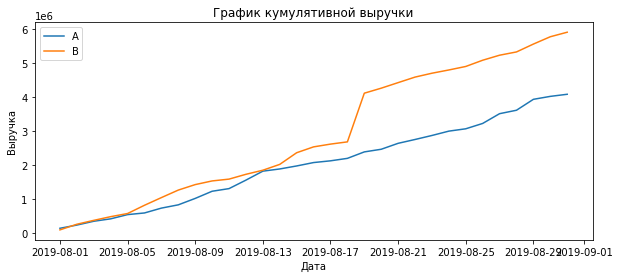

In [126]:


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

from matplotlib.pyplot import figure
figure(figsize=(10, 4))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Куммулятивная выручка в группе В на всем промежутке времени выше, чем в группе А, причем  резко выросла в районе 18 августа. 

Возможные причины скачка:

1) В группе В был совершен аномально дорогой заказ  
2) В группе В увеличилось среднее количество заказов на пользователя  
3) В группе В увеличился средний чек  

Какая из причин более вероятна, можно будет узнать, изучив графики среднего чека и среднего количества заказов по группам

### График кумулятивного среднего чека по группам

Text(0, 0.5, 'Средний чек')

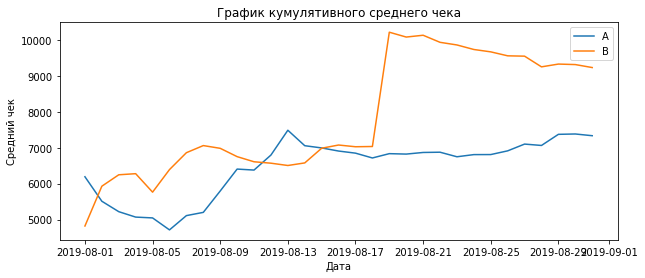

In [127]:
from matplotlib.pyplot import figure
figure(figsize=(10, 4))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')

Предыдущее предположение подтверждается графиком среднего чека по дням - виден явный скачок линии группы Б, что говорит о наличии аномально дорогой покупки в этот период. 

###  График относительного изменения кумулятивного среднего чека группы B к группе A

Text(0, 0.5, 'Отношение В к А')

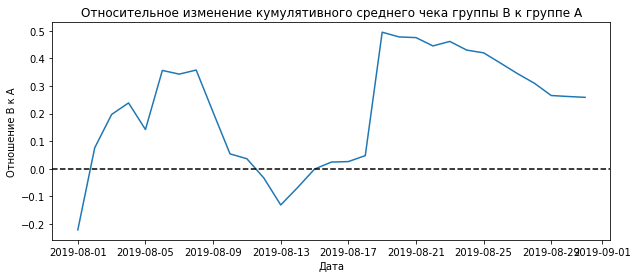

In [128]:
figure(figsize=(10, 4))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение В к А')

На графике есть несколько сильных всплесков. Скорее всего, в эти периоды были совершены аномально дорогие заказы

###  График кумулятивного среднего количества заказов на посетителя по группам

Text(0, 0.5, 'Конверсия')

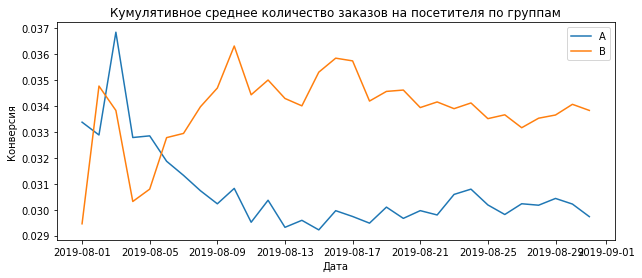

In [129]:
figure(figsize=(10, 4))

# Строим график кумулятивного среднего количества заказов группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/ cumulativeRevenueA['visitors'], label='A')

# Строим график кумулятивного среднего количества заказов группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/ cumulativeRevenueB['visitors'], label='B')

plt.legend() 


plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')

В начале месяца среднее куммулятивное количество заказов на посетителя сильно скачет у обеих групп. Далее значения стабилизируются, среднее количество заказов в группе B выше, чем в группе A

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [130]:
mergedCumulativeRevenue.columns

Index(['date', 'revenueA', 'ordersA', 'visitorsA', 'revenueB', 'ordersB',
       'visitorsB'],
      dtype='object')

Text(0, 0.5, 'Конверсия')

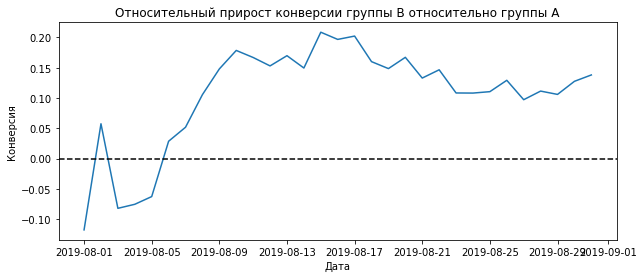

In [131]:
figure(figsize=(10, 4))

# cтроим отношение 
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')

График относительного куммулятивного изменения количества заказов на посетителя группы В к группе А относительно стабилен после 9 августа. В начале месяца наблюдается резкий всплеск, потом падение, что может говорить о довольно значительных различиях в количестве заказов на посетителя в начале месяца.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Графики построены и интерпретированы верно, молодец)
</div>

### Точечный график количества заказов по пользователям

Text(0, 0.5, 'Количество')

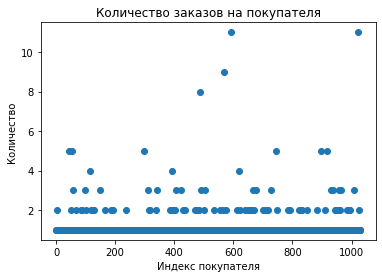

In [132]:
ordersByUsers = (
   orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов на покупателя')
plt.xlabel('Индекс покупателя')
plt.ylabel('Количество')


Большая часть пользователей совершала одну или две покупки. Но также есть немало пользователей количеством покупок от 3 до 5. Выше пяти покупок можно считать аномальным значением

###  95-й и 99-й перцентили количества заказов на пользователя

In [133]:
# считаем 95 и 99 перцентили
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


У 5% пользователей покупок больше, чем 2, и у 1% больше четырех покупок. Значит можно отсеять заказы, которых больше 4х на пользователя

### Точечный график стоимостей заказов

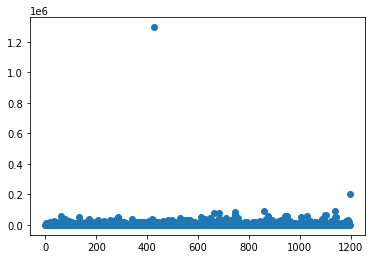

In [134]:
# стоим график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

На графике видно, что как правило заказы не превышают 100 000 руб. Есть также выбросы в районе 200 000 и 1 300 000 руб

Text(0, 0.5, 'Стоимость заказа')

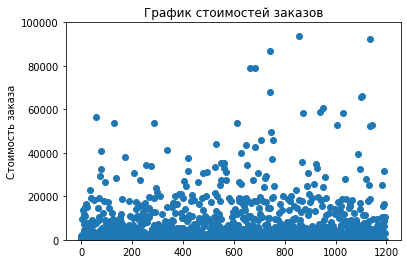

In [135]:
plt.scatter(x_values, orders['revenue']) 
plt.ylim([0,100000])

plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа')

Теперь по графику отчетливо видно, что большая часть покупок стоят меньше 20тыс рублей

### 95-й и 99-й перцентили стоимости заказов

In [136]:
# считаем 95 и 99 перцентили
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Лишь 5% заказов на сумму больше 28000 руб, и 1% выше 58233.2 руб. Для удобства можно отсекать значения выше 58тыс рублей

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Подготовим данные для теста Манна-Уитни

In [137]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
ordersByUsersA.columns=['visitorId','orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
ordersByUsersB.columns=['visitorId','orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(0, 
                  index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
                  ),
                  name='orders'
                 )
    ],
    axis=0)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series
        (0,
         index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
         ),
         name='orders'
        )
    ],
    axis=0)

Зададим нулевую и альтернативную гипотезы:   
    
**Нулевая гипотеза:** Различий в среднем количестве заказов на посетителя между группами нет  

**Альтернативная гипотеза:** Различия в  среднем количестве заказов на посетителя между группами есть

In [138]:

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

print('Среднее количество заказов на посетителя группы А: {:.4}'.format(sampleA.mean()))
print('Среднее количество заказов на посетителя группы B: {:.4}'.format(sampleB.mean())) 

0.01679
0.138
Среднее количество заказов на посетителя группы А: 0.02973
Среднее количество заказов на посетителя группы B: 0.03383


P-value меньше 0.05, что говорит о различии в среднем количестве заказов на посетителя между группами. Нулевую гипотезу отвергаем. Относительное различие в среднем между группами - 13,8%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Нулевая гипотеза:** Различий в средних чеках между группами нет

**Альтернативная гипотеза:** Различия в средних чеках между группами есть


In [139]:


print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean())) 

0.729
0.259
Средний чек группы А: 7333.58
Средний чек группы B: 9230.88


P-value больше 0.05, значит между двумя группами нет статистически значимых различий в значениях среднего чека, несмотря на то, что разница суммы среднего чего между двумя группами составляет целых 26%

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее мы приняли за аномальные значения: 
- количество заказов больше 4 
- средний чек выше 58000 руб

Уберем пользователей с этими значениями из исследования

In [140]:
# готовим данные к очистке от аномальных значений, выявляем пользователей с аномально большим количеством заказов

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] >np.percentile(orders['revenue'], [95, 99])[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Кол-во аномальных пользователей: ', abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
Кол-во аномальных пользователей:  15


Выявлено 15"аномальных" пользователей. Удалим их из исследования

In [141]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum()  - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum()  - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
print('Среднее количество заказов на посетителя группы А: {:.4}'.format(sampleAFiltered.mean()))
print('Среднее количество заказов на посетителя группы B: {:.4}'.format(sampleBFiltered.mean())) 

0.014
0.153
Среднее количество заказов на посетителя группы А: 0.02825
Среднее количество заказов на посетителя группы B: 0.03258


 P-value меньше 0.05 и можно сделать вывод, что у очищенных данных все равно есть статистически значимое различие среднего количества заказов между группами А и B, лидирует группа В

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [142]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 



0.851
-0.006


P-value больше 0.05, значит статистически значимого разниличия в средней сумме чека между группами А и В в очищенных по-прежнему данных нет.

**Вывод:**

После очищения данных от аномальных значений группа В продолжила показывать лучшие результаты по количеству заказов на посетителя, при том, что средний чек у обеих групп был приблизительно одинаков. Можно сделать вывод о победе группы B и остановить исследование

**Общий вывод по результатам А/B тестирования:**

1) Большая часть пользователей совершала не более 4х покупок на сумму не более 58000 руб  
2) Между группами нет статистически значимого различия в среднем чеке ни по сырым, ни по очищенным данным   
3) У группы В выше среднее количество заказов на пользователя как по сырым, так и по очищенным данным  
4) График куммулятивного среднего количества заказов показывает, что результаты группы А стабильно падают     
5) Нужно остановить исследование и признать победу группы В